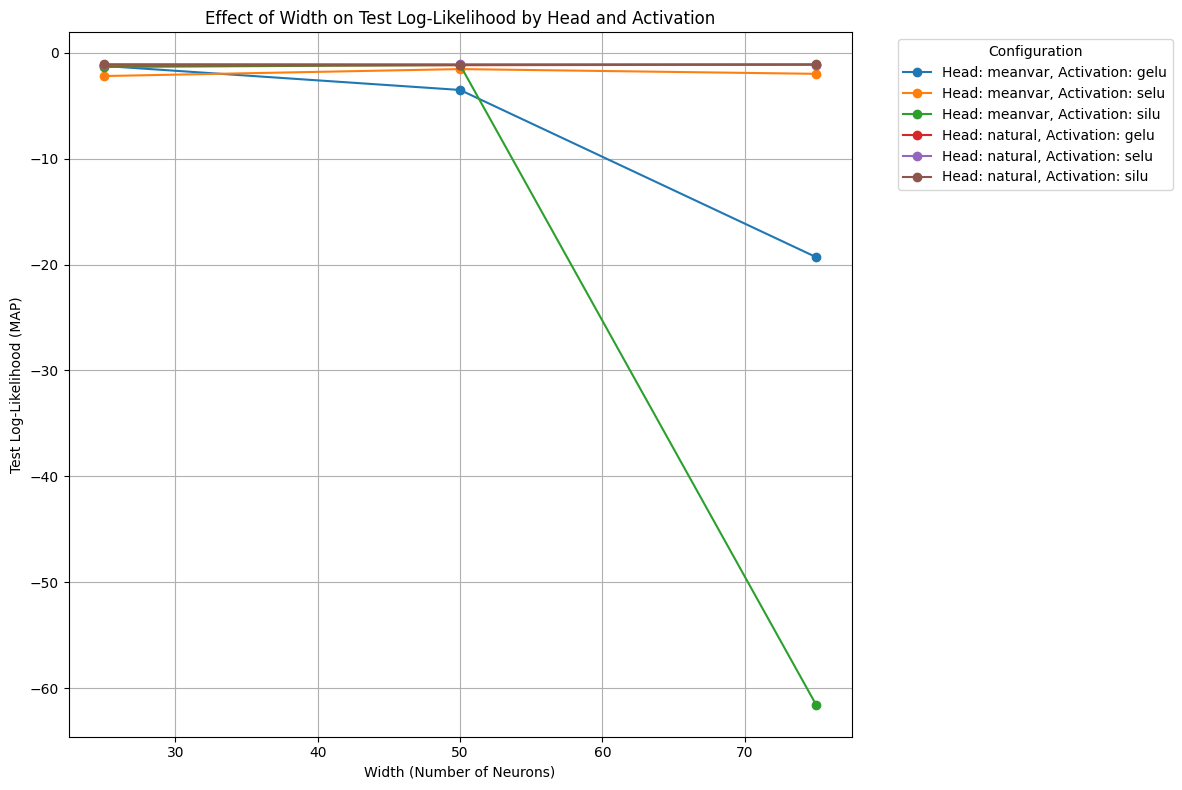

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据
# 替换路径为你的文件路径
file_path = "depth=1.csv"  # 请确保文件名和路径正确
data = pd.read_csv(file_path)

# 2. 过滤相关列
filtered_data = data[['width', 'head', 'activation', 'test/loglik']].copy()

# 3. 确保数据为数值类型
filtered_data['test/loglik'] = pd.to_numeric(filtered_data['test/loglik'], errors='coerce')

# 4. 按照 'head', 'activation', 'width' 分组，并计算平均值（如果有重复值）
grouped_data = filtered_data.groupby(['head', 'activation', 'width']).mean().reset_index()

# 5. 获取所有 'head' 和 'activation' 组合
unique_combinations = grouped_data[['head', 'activation']].drop_duplicates()

# 6. 绘制折线图
plt.figure(figsize=(12, 8))

# 为每个 head 和 activation 的组合绘制单独的曲线
for _, combination in unique_combinations.iterrows():
    subset = grouped_data[
        (grouped_data['head'] == combination['head']) & 
        (grouped_data['activation'] == combination['activation'])
    ]
    plt.plot(
        subset['width'], 
        subset['test/loglik'], 
        label=f"Head: {combination['head']}, Activation: {combination['activation']}", 
        marker='o'
    )

# 7. 图表美化

plt.xlabel('Width (Number of Neurons)')
plt.ylabel('Test Log-Likelihood (MAP)')
plt.title('Effect of Width on Test Log-Likelihood by Head and Activation')
plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 8. 显示图表
plt.show()


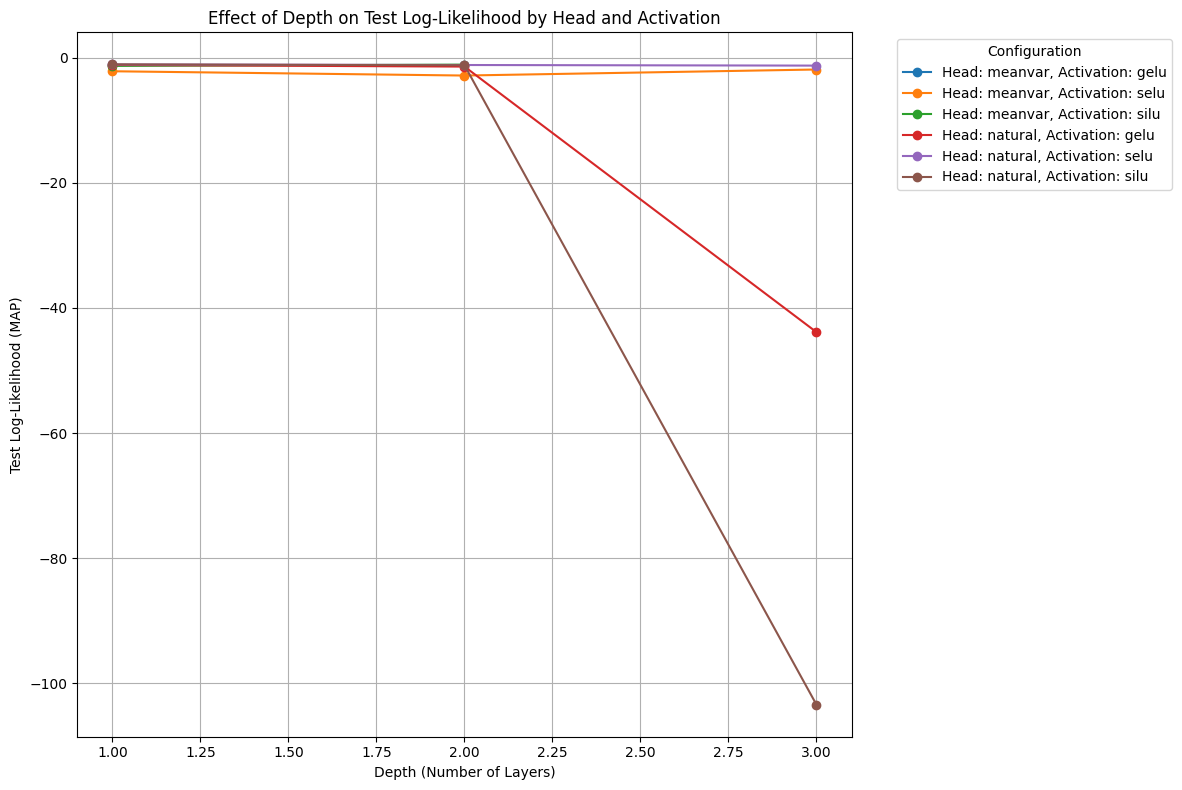

In [3]:

file_path = "width=25.csv"  
data = pd.read_csv(file_path)

filtered_data = data[['depth', 'head', 'activation', 'test/loglik']].copy()

filtered_data['test/loglik'] = pd.to_numeric(filtered_data['test/loglik'], errors='coerce')

grouped_data = filtered_data.groupby(['depth', 'head', 'activation']).mean().reset_index()

unique_combinations = grouped_data[['head', 'activation']].drop_duplicates()

# 绘制折线图
plt.figure(figsize=(12, 8))

for _, combination in unique_combinations.iterrows():
    subset = grouped_data[
        (grouped_data['head'] == combination['head']) & 
        (grouped_data['activation'] == combination['activation'])
    ]
    plt.plot(
        subset['depth'], 
        subset['test/loglik'], 
        label=f"Head: {combination['head']}, Activation: {combination['activation']}", 
        marker='o'
    )

plt.xlabel('Depth (Number of Layers)')
plt.ylabel('Test Log-Likelihood (MAP)')
plt.title('Effect of Depth on Test Log-Likelihood by Head and Activation')
plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
# 
plt.savefig("xx.jpg",**{'dpi':300,"bbox_inches":"tight"}
# 8. 显示图表
plt.show()
